#### main setting

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

np.random.seed(4111064232)

#### Dataset

In [51]:
A_ans = np.array([[41110, 64232]])
dimand = 2

n_samples = 1000

# Mean and standard deviation for Gaussian noise
mean = 0
std_dev = 0.1

x_dataset = []

B_with_noise = np.zeros((n_samples, 1))

for i in range(n_samples):
    X = np.random.rand(dimand, 1)
    # print("reshape", X, "\n")
    x_dataset.append(X)
    b = A_ans @ X
    noise = np.random.normal(mean, std_dev)
    B_with_noise[i] = b + noise

# print("X", x_dataset, "\n", "B", B_with_noise)

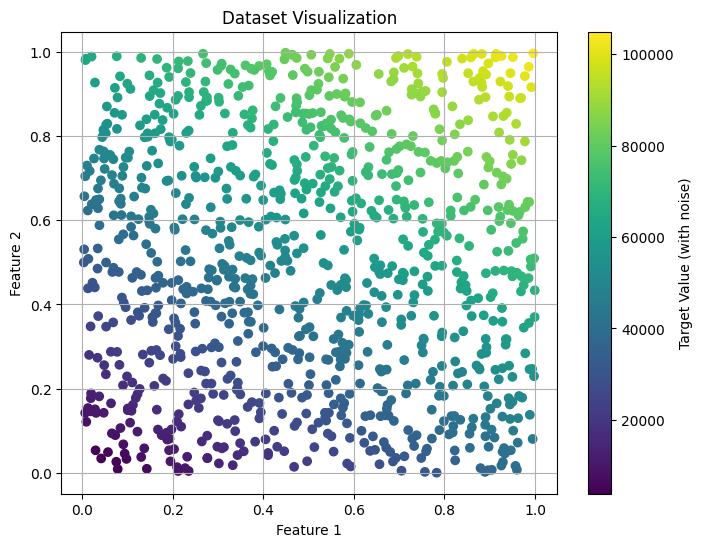

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in x_dataset], [x[1] for x in x_dataset], c=B_with_noise, cmap='viridis')
plt.colorbar(label='Target Value (with noise)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.grid(True)
plt.show()


#### batch gradient descent.
eta 7m 55.6s

In [53]:
def batch_objective_function(A, x_dataset, b_dataset):
    total_cost = 0
    for i in range(len(x_dataset)):
        total_cost += 0.5 * np.square(np.dot(A, x_dataset[i]) - b_dataset[i])
    return total_cost / len(x_dataset)

def batch_gradient(A, x_dataset, b_dataset):
    total_grad = np.zeros_like(A, dtype=np.float64)
    for i in range(len(x_dataset)):
        total_grad += (A @ x_dataset[i] - b_dataset[i]) * x_dataset[i].T
    return total_grad / len(x_dataset)

def batch_GD(A, x_dataset, b_dataset, learning_rate = 0.01):
    fooValues = []

    i = 0
    while True:
        grad = batch_gradient(A, x_dataset, b_dataset)

        A_new = A - learning_rate * grad

        fooValues.append(batch_objective_function(A, x_dataset, b_dataset)[0][0])
        # Print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {fooValues[i]}")

        if(np.abs(batch_objective_function(A_new, x_dataset, b_dataset) - batch_objective_function(A, x_dataset, b_dataset)) < 1e-5):
            break

        A = A_new
        i += 1

    filePath = "Batch.data.pickle"
    with open(filePath, 'wb') as f:
        pickle.dump({"A":A, "fooValues":fooValues}, f)

    return A, fooValues

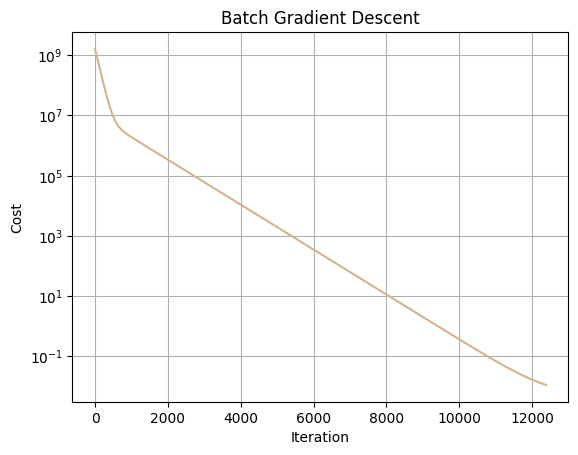

In [70]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
# Batch_GD_A, batch_foo_values = batch_GD(A_initial, x_dataset, B_with_noise)
# print(Batch_GD_A)
filePath = "Batch.data.pickle"
with open(filePath, 'rb') as f:
    loadedData = pickle.load(f)
    Batch_GD_A = loadedData['A']
    batch_foo_values = loadedData['fooValues']

plt.plot(range(len(batch_foo_values)), batch_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent')
plt.grid(True)
plt.show()

#### stochastic gradient descent
eta 0.4s

In [55]:
def stochastic_objective_function(A, x, b):
    return 0.5 * np.square(np.dot(A, x) - b)

def stochastic_gradient(A, x, b):
    return (np.dot(A, x) - b) * x.T

def stochastic_GD(A, x_dataset, b_dataset, learning_rate=0.01):
    foo_values = []
    epoch = 0
    letmeout = False
    while True:
        for i in range(len(x_dataset)):
            x = x_dataset[i]
            b = b_dataset[i]

            grad = stochastic_gradient(A, x, b)
            A_new = A - learning_rate * grad
            cost = stochastic_objective_function(A_new , x, b)
            foo_values.append(cost[0][0])
            # Record cost periodically
            if i % 100 == 0:
                print(f"Epoch {epoch}, Iteration {i}: Cost = {cost}")

            if(np.abs(stochastic_objective_function(A_new, x, b) - stochastic_objective_function(A, x, b)) < 1e-5):
                letmeout = True
                break
            A = A_new

        epoch += 1
        if(letmeout):
            break

    return A, foo_values


Epoch 0, Iteration 0: Cost = [[1.96193099e+09]]
Epoch 0, Iteration 100: Cost = [[7.11398317e+08]]
Epoch 0, Iteration 200: Cost = [[3.54095834e+08]]
Epoch 0, Iteration 300: Cost = [[99544889.06979492]]
Epoch 0, Iteration 400: Cost = [[7969838.00439168]]
Epoch 0, Iteration 500: Cost = [[966938.00729728]]
Epoch 0, Iteration 600: Cost = [[17734291.70011212]]
Epoch 0, Iteration 700: Cost = [[5213969.28449761]]
Epoch 0, Iteration 800: Cost = [[6756455.84750403]]
Epoch 0, Iteration 900: Cost = [[687614.94120045]]
Epoch 1, Iteration 0: Cost = [[10461967.57281461]]
Epoch 1, Iteration 100: Cost = [[4497122.6078192]]
Epoch 1, Iteration 200: Cost = [[3611271.0493828]]
Epoch 1, Iteration 300: Cost = [[540366.3544585]]
Epoch 1, Iteration 400: Cost = [[321264.4774556]]
Epoch 1, Iteration 500: Cost = [[72382.99193599]]
Epoch 1, Iteration 600: Cost = [[1619371.87859976]]
Epoch 1, Iteration 700: Cost = [[514869.1460212]]
Epoch 1, Iteration 800: Cost = [[1539605.54691615]]
Epoch 1, Iteration 900: Cost = 

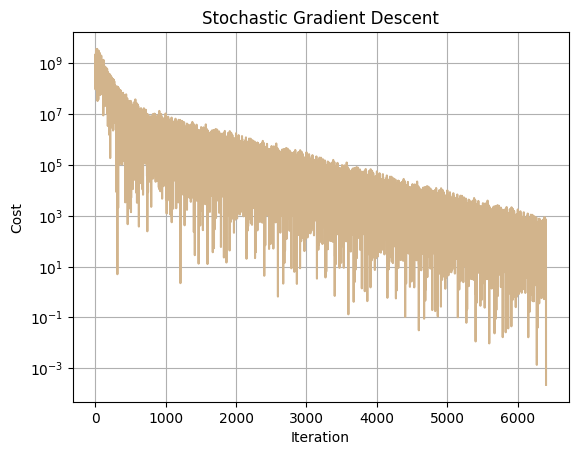

In [71]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Stochastic_GD_A, stochastic_foo_values = stochastic_GD(A_initial, x_dataset, B_with_noise)

print(Stochastic_GD_A)

plt.plot(range(len(stochastic_foo_values)), stochastic_foo_values, color="tan")
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.grid(True)
plt.show()

#### Armijo Rule

##### batch gradient descent with armijo rule
eta 8.5s

In [74]:
def batch_objective_function(A, x_dataset, b_dataset):
    total_cost = 0
    for i in range(len(x_dataset)):
        total_cost += 0.5 * np.square(np.dot(A, x_dataset[i]) - b_dataset[i])
    return total_cost / len(x_dataset)

def batch_gradient(A, x_dataset, b_dataset):
    total_grad = np.zeros_like(A, dtype=np.float64)
    for i in range(len(x_dataset)):
        total_grad += (A @ x_dataset[i] - b_dataset[i]) * x_dataset[i].T
    return total_grad / len(x_dataset)

def armijo_rule(A, x_dataset, b_dataset, grad, learning_rate = 1.0, arimijo_c = 0.5, rho = 0.5):
    while True:
        A_new = A - learning_rate * grad
        f1 = batch_objective_function(A, x_dataset, b_dataset)
        f2 = batch_objective_function(A_new, x_dataset, b_dataset)
        imp = arimijo_c * learning_rate *  -np.sum(grad**2)
        if f2 <= f1 + imp:
            break
        learning_rate *= rho
    return learning_rate

def batch_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    i = 0
    while True:
        grad = batch_gradient(A, x_dataset, b_dataset)
        # Apply Armijo rule to determine the step size
        learning_rate = armijo_rule(A, x_dataset, b_dataset, grad)

        A_new = A - learning_rate * grad
        foo_values.append(batch_objective_function(A_new, x_dataset, b_dataset)[0][0])

        # Print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {foo_values[i]}")

        if np.abs(batch_objective_function(A_new, x_dataset, b_dataset) - batch_objective_function(A, x_dataset, b_dataset)) < 1e-5:
            break

        A = A_new
        i += 1

    return A, foo_values

Iteration 0: Cost = 291852100.0383249
Iteration 100: Cost = 0.13954422044871578
[[41110.01906531 64231.98713514]]


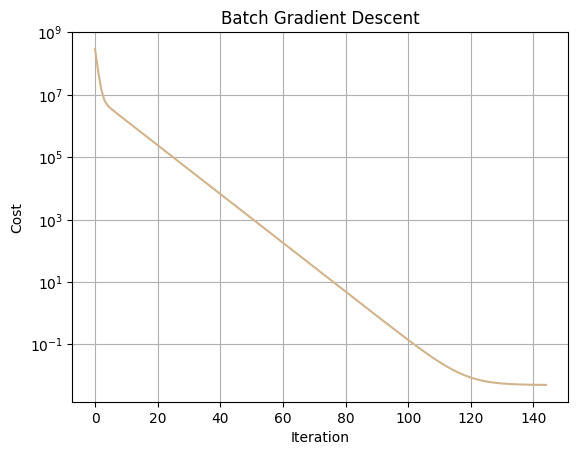

In [76]:
# A initial guess
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Batch_GD_A, batch_foo_values = batch_GD_with_armijo(A_initial, x_dataset, B_with_noise)

print(Batch_GD_A)

plt.plot(range(len(batch_foo_values)), batch_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent')
plt.grid(True)
plt.show()

##### stochastic gradient descent with armijo rule
eta 0.1s

In [59]:
def stochastic_objective_function(A, x, b):
    return 0.5 * np.square(np.dot(A, x) - b)

def stochastic_gradient(A, x, b):
    return (np.dot(A, x) - b) * x.T

def armijo_rule(A, x, b, grad, arimijo_c=0.5, rho=0.5):
    learningRate = 1.0
    while True:
        f1 = stochastic_objective_function(A, x, b)
        f2 = stochastic_objective_function(A - learningRate * grad, x, b)
        imp = arimijo_c * learningRate * -np.sum(grad**2)
        if f2 <= f1 + imp:
            break
        learningRate *= rho
    return learningRate

def stochastic_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    epoch = 0
    letmeout = False
    while True:
        for i in range(len(x_dataset)):
            x = x_dataset[i]
            b = b_dataset[i]

            grad = stochastic_gradient(A, x, b)
            # Apply Armijo rule to determine the step size
            t = armijo_rule(A, x, b, grad)
            A_new = A - t * grad

            cost = stochastic_objective_function(A_new , x, b)
            foo_values.append(cost[0][0])
            # Record cost periodically
            if i % 100 == 0:
                print(f"Epoch {epoch}, Iteration {i}: Cost = {cost}")

            if(np.abs(stochastic_objective_function(A_new, x, b) - stochastic_objective_function(A, x, b)) < 1e-5):
                letmeout = True
                break
            A = A_new

        epoch += 1
        if(letmeout):
            break

    return A, foo_values

Epoch 0, Iteration 0: Cost = [[3087647.24161493]]
Epoch 0, Iteration 100: Cost = [[0.26145816]]
[[41109.46320348 64232.35003022]]


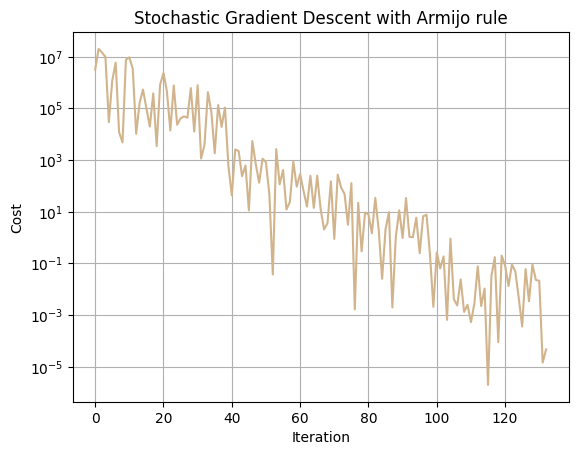

In [60]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Stochastic_GD_A, stochastic_foo_values = stochastic_GD_with_armijo(A_initial, x_dataset, B_with_noise)
print(Stochastic_GD_A)

plt.plot(range(len(stochastic_foo_values)), stochastic_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent with Armijo rule')
plt.grid(True)
plt.show()

#### Newton's method

##### batch gradient descent with Newton's direction

In [61]:
def batch_objective_function(A, x_dataset, b_dataset):
    total_cost = 0
    for i in range(len(x_dataset)):
        total_cost += 0.5 * np.square(np.dot(A, x_dataset[i]) - b_dataset[i])
    return total_cost / len(x_dataset)

def batch_gradient(A, x_dataset, b_dataset):
    total_grad = np.zeros_like(A, dtype=np.float64)
    for i in range(len(x_dataset)):
        total_grad += (A @ x_dataset[i] - b_dataset[i]) * x_dataset[i].T
    return total_grad / len(x_dataset)

def batch_hessian(A, x_dataset):
    hessian = np.zeros((A.shape[0], A.shape[0]))
    for x in x_dataset:
        hessian += x.T @ x
    return hessian / len(x_dataset)

def armijo_rule(A, x_dataset, b_dataset, grad, learning_rate = 1.0, arimijo_c = 0.5, rho = 0.5):
    while True:
        A_new = A - learning_rate * grad
        f1 = batch_objective_function(A, x_dataset, b_dataset)
        f2 = batch_objective_function(A_new, x_dataset, b_dataset)
        imp = arimijo_c * learning_rate *  -np.sum(grad**2)
        if f2 <= f1 + imp:
            break
        learning_rate *= rho
    return learning_rate

def batch_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    i = 0
    while True:
        grad = batch_gradient(A, x_dataset, b_dataset)
        # Apply Armijo rule to determine the step size
        learning_rate = armijo_rule(A, x_dataset, b_dataset, grad)
        hessian = batch_hessian(A, x_dataset)
        A_new = A - learning_rate * grad * np.linalg.inv(hessian)
        foo_values.append(batch_objective_function(A_new, x_dataset, b_dataset)[0][0])

        # Print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {foo_values[i]}")

        if np.abs(batch_objective_function(A_new, x_dataset, b_dataset) - batch_objective_function(A, x_dataset, b_dataset)) < 1e-5:
            break

        A = A_new
        i += 1

    return A, foo_values

Iteration 0: Cost = 291852100.0383249
Iteration 100: Cost = 0.13954422044871578
[[41110.01906531 64231.98713514]]


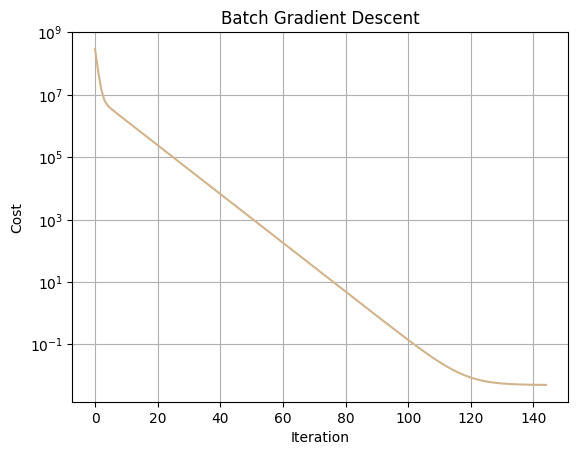

In [77]:
# A initial guess
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Batch_GD_A, batch_foo_values = batch_GD_with_armijo(A_initial, x_dataset, B_with_noise)

print(Batch_GD_A)

plt.plot(range(len(batch_foo_values)), batch_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent')
plt.grid(True)
plt.show()

##### stochastic gradient descent with Newton's direction

In [63]:
def stochastic_objective_function(A, x, b):
    return 0.5 * np.square(np.dot(A, x) - b)

def stochastic_gradient(A, x, b):
    return (np.dot(A, x) - b) * x.T

def stochastic_hessian(A, x):
    return x.T @ x

def armijo_rule(A, x, b, grad, arimijo_c=0.5, rho=0.5):
    learningRate = 1.0
    while True:
        f1 = stochastic_objective_function(A, x, b)
        f2 = stochastic_objective_function(A - learningRate * grad, x, b)
        imp = arimijo_c * learningRate * -np.sum(grad**2)
        if f2 <= f1 + imp:
            break
        learningRate *= rho
    return learningRate

def stochastic_GD_with_armijo(A, x_dataset, b_dataset):
    foo_values = []
    epoch = 0
    letmeout = False
    while True:
        for i in range(len(x_dataset)):
            x = x_dataset[i]
            b = b_dataset[i]

            grad = stochastic_gradient(A, x, b)
            # Apply Armijo rule to determine the step size
            t = armijo_rule(A, x, b, grad)
            hessian = stochastic_hessian(A, x)
            A_new = A - t * grad * np.linalg.inv(hessian)

            cost = stochastic_objective_function(A_new , x, b)
            foo_values.append(cost[0][0])
            # Record cost periodically
            if i % 1000 == 0:
                print(f"Epoch {epoch}, Iteration {i}: objValue = {stochastic_objective_function(A_new, x, b)}")

            if(np.abs(stochastic_objective_function(A_new, x, b) - stochastic_objective_function(A, x, b)) < 1e-5):
                letmeout = True
                break
            A = A_new

        epoch += 1
        if(letmeout):
            break

    return A, foo_values

Epoch 0, Iteration 0: objValue = [[1.05879118e-22]]
[[41110.07760967 64231.95173236]]


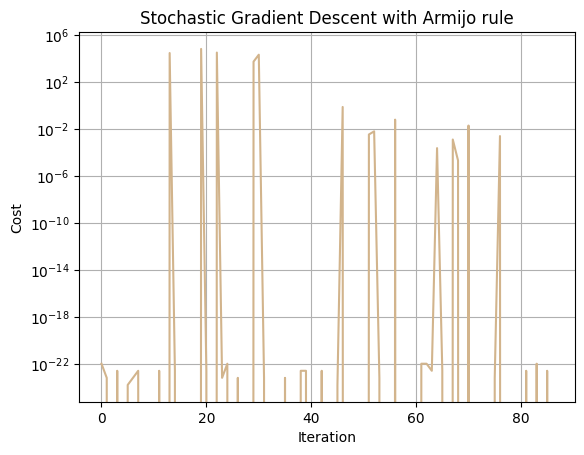

In [64]:
A_initial = np.zeros_like(A_ans, dtype=np.float64)
Stochastic_GD_A, stochastic_foo_values = stochastic_GD_with_armijo(A_initial, x_dataset, B_with_noise)
print(Stochastic_GD_A)

plt.plot(range(len(stochastic_foo_values)), stochastic_foo_values, color="tan")
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent with Armijo rule')
plt.grid(True)
plt.show()

#### Quasi-Newton

##### Davidon–Fletcher–Powell formula (DFP)

##### Broyden–Fletcher–Goldfarb–Shanno (BFGS)

#### Conjugate Gradient

##### Fletcher-Reeves

##### Polak-Ribiere